In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Exploration

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Check Missing Values

In [23]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values in Each Columns')

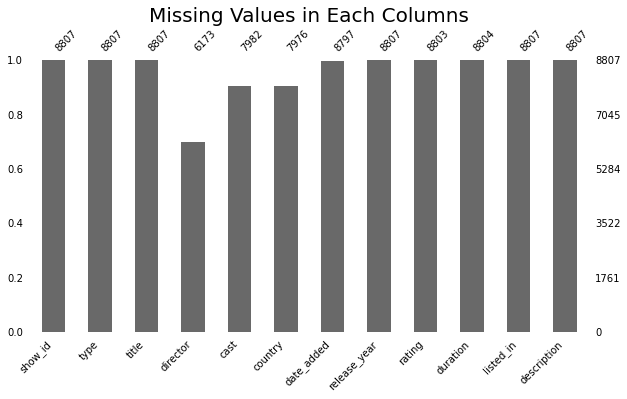

In [24]:
# Plot missing values in columns
import missingno
missingno.bar(df, fontsize=10, figsize=(10,5))
plt.title('Missing Values in Each Columns',fontsize=20)

1) There are missing values in column director, cast, country, date_added, rating and duration.
2) For columns director and cast, we can not fill the missing value. So, we can delete the missing value if necessary.
3) For column country, date_added, rating and duration, we can fill the data with the mode or the mean value.

## Handle Missing Values

In [25]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [26]:
df = df.dropna(how="any", subset=['director', 'cast'])

In [27]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [29]:
df.duplicated().sum()

0

## Data Cleaning

In [31]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [43]:
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))
df = df.rename(columns={'listed_in': 'Genre'})

genre = df['Genre'].str.split(',').dropna().to_numpy()
genre = np.unique(sum(genre, []))
print(len(genre))
genre

70


array([' Anime Features', ' Children & Family Movies',
       ' Classic & Cult TV', ' Classic Movies', ' Comedies',
       ' Crime TV Shows', ' Cult Movies', ' Documentaries', ' Docuseries',
       ' Dramas', ' Faith & Spirituality', ' Horror Movies',
       ' Independent Movies', ' International Movies',
       ' International TV Shows', " Kids' TV", ' Korean TV Shows',
       ' LGBTQ Movies', ' Music & Musicals', ' Reality TV',
       ' Romantic Movies', ' Romantic TV Shows', ' Sci-Fi & Fantasy',
       ' Science & Nature TV', ' Spanish-Language TV Shows',
       ' Sports Movies', ' Stand-Up Comedy',
       ' Stand-Up Comedy & Talk Shows', ' TV Action & Adventure',
       ' TV Comedies', ' TV Dramas', ' TV Horror', ' TV Mysteries',
       ' TV Sci-Fi & Fantasy', ' TV Thrillers', ' Teen TV Shows',
       ' Thrillers', 'Action & Adventure', 'Anime Features',
       'Anime Series', 'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',


In [44]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(', ')[1])
df['month_added'] = df['date_added'].apply(lambda x: x.split(' ')[0])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,num_genres,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,2021,September
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,3,2021,September
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,2021,September
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,2021,September
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,2016,March
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",3,2019,November
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2,2019,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2,2020,January


In [45]:
df['country_main'] = df['country'].apply(lambda x: x.split(',')[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,num_genres,year_added,month_added,country_main
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,2021,September,United States
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,3,2021,September,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,2021,September,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,2021,September,United Kingdom


In [46]:
df['type'].value_counts()

Movie      5522
TV Show     178
Name: type, dtype: int64

In [49]:
df['rating'].value_counts()

TV-MA       1940
TV-14       1329
R            789
PG-13        477
TV-PG        456
PG           279
TV-Y7        123
TV-Y         102
TV-G          96
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### Split the data set into two dataframes. One is Movie dataframe, and the other is TV Show dataframe.

In [52]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,num_genres,year_added,month_added,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,2021,September,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2,2021,September,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2,2021,September,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,2,2021,September,United States


## Exploratory Data Analysis

<BarContainer object of 2 artists>

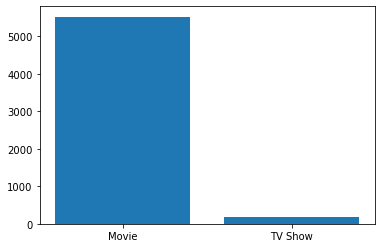

In [57]:
plt.bar(df['type'].value_counts().index, df['type'].value_counts())
# There are more Movies than TV Shows on Netflix

### Movie and TV Shows trend analysis

#### Production Trend

Text(0.5, 1.0, 'Movie and TV Show Production Trends')

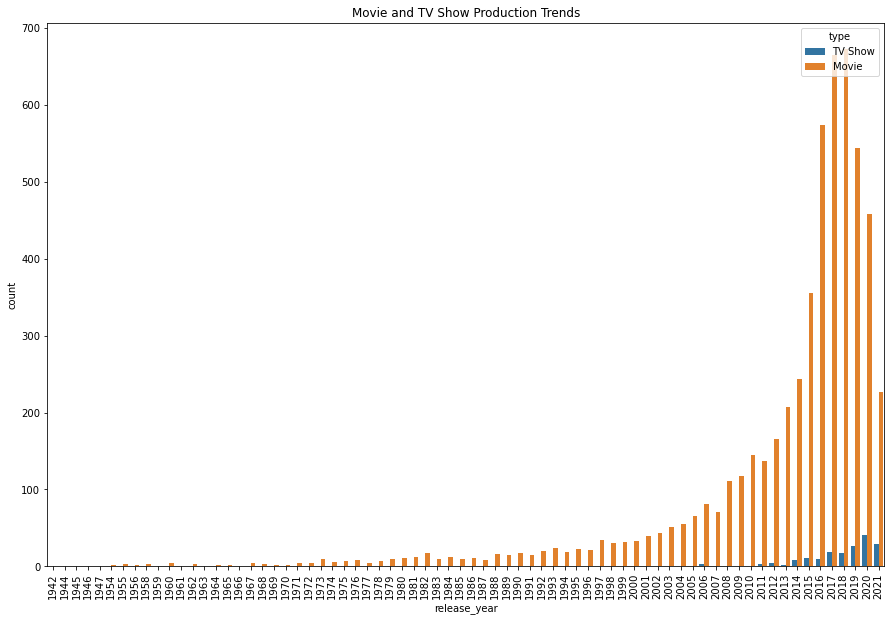

In [108]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='release_year', hue='type', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Movie and TV Show Production Trends")

#### Trends on Netflix

Text(0.5, 1.0, 'Movie and TV Show Trends on Netflix')

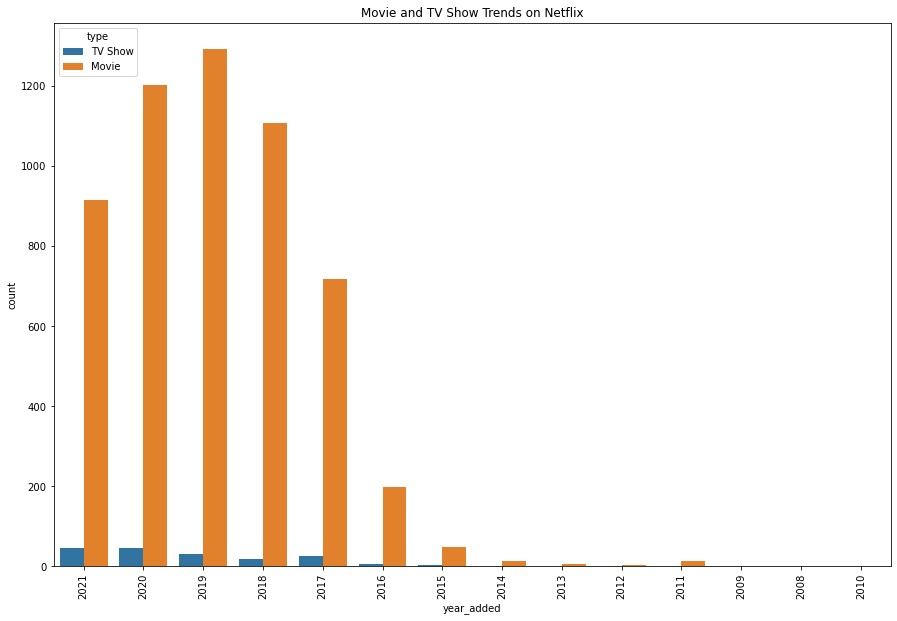

In [109]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='year_added', hue='type', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Movie and TV Show Trends on Netflix")

### Movie and TV Shows Ratings Analysis